---
title: Visualization & Figure Creation (ipynb)
description: Creating static figures using Seaborn
authors:
  - userId: fI5cWFyZPEZCTpIHdqX5H8OU3Iv1
    name: Steve Purves
    orcid: 0000-0002-0760-5497
    corresponding: false
    roles: []
    affiliations: []
date: '2022-06-07T09:08:15.504Z'
name: visualizaton-figure-creation-seaborn
oxa: oxa:1Bk7uPlcMuaTyKEshESj/Z3pjZzJ7KnN6TVbWndBR
tags: []
thumbnail: thumbnails/visualizaton-figure-creation-seaborn.png
---

## Visualization of La Palma Earthquake Data

Using the subset of IGN data specific to La Palma. This subset was prepared using `screening.ipynb` and saved to `lapalma.csv`. Updates 30th Nov.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
alt.data_transformers.enable('default', max_rows=None)
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")

In [10]:
df = pd.read_csv('./lapalma_update.csv')
df.head()

Event        Date      Time  Latitude  Longitude  Depth(km)  \
0  es2022jzhhn  2022-05-22  21:10:30   28.6623   -17.9605       21.0   
1  es2022jydan  2022-05-22  05:53:06   28.5903   -17.8987       12.0   
2  es2022jvzxr  2022-05-21  02:02:53   28.6328   -17.8750       12.0   
3  es2022jvsin  2022-05-20  22:13:05   28.6074   -17.8939        4.0   
4  es2022jtqen  2022-05-19  18:51:49   28.6225   -17.9355        2.0   

  Intensity  Magnitude  Type Mag          Location  
0       NaN        1.8         4  NW TAZACORTE.ILP  
1       NaN        1.8         4  SE TAZACORTE.ILP  
2       NaN        1.2         4     S EL PASO.ILP  
3       NaN        1.5         4    SW EL PASO.ILP  
4       NaN        1.4         4   S TAZACORTE.ILP

In [3]:
df.describe()

Latitude    Longitude    Depth(km)    Magnitude  More Info
count  9098.000000  9098.000000  9098.000000  9098.000000        0.0
mean     28.566890   -17.839844    14.031875     2.682919        NaN
std       0.016284     0.021431     8.336468     0.512196        NaN
min      28.477500   -17.969500     0.000000     1.500000        NaN
25%      28.558400   -17.846600    10.300000     2.400000        NaN
50%      28.563600   -17.836900    11.300000     2.700000        NaN
75%      28.571000   -17.829100    13.500000     3.000000        NaN
max      28.697000   -17.705700    46.900000     5.100000        NaN

In [11]:
df['Depth'] = 'Crustal (<20km)'
df.loc[df['Depth(km)'] >= 20, 'Depth'] = 'Mantle (>20km)'

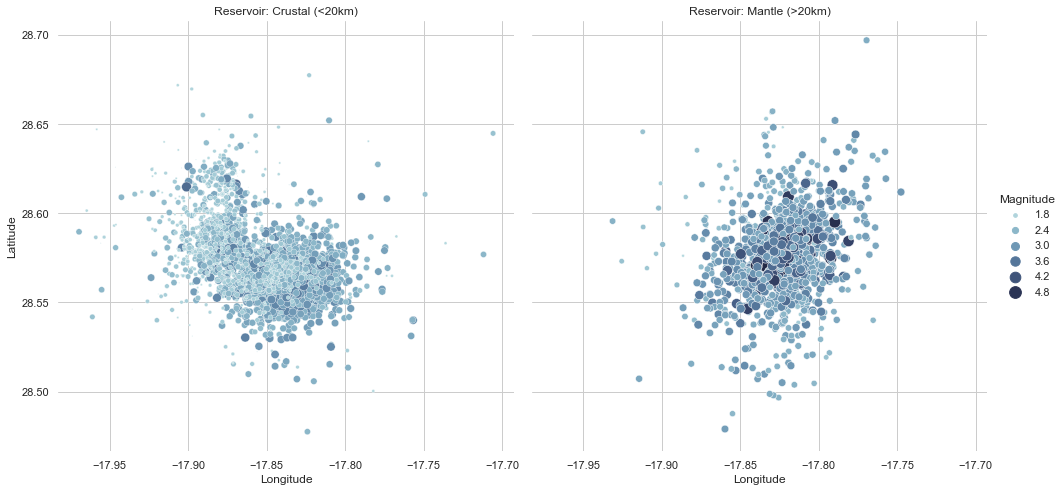

In [6]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

g = sns.relplot(
    data=df,
    x="Longitude", y="Latitude",
    size="Magnitude", hue="Magnitude",
    col='Depth',
    palette=cmap,
    height=7,
    sizes=(1,150),
).set_titles("Reservoir: {col_name}")
_=g.despine(left=True, bottom=True)


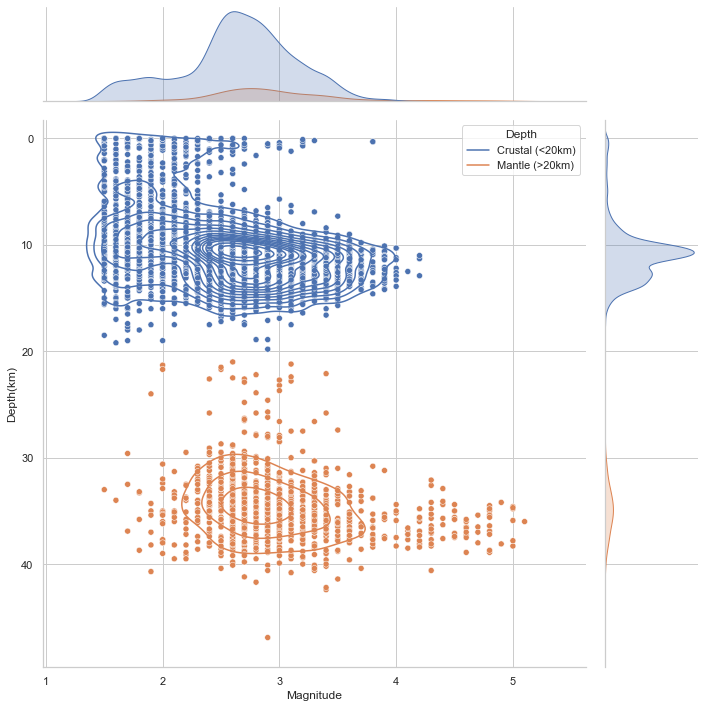

In [7]:
g = sns.jointplot(x="Magnitude", y="Depth(km)", data=df,
                  kind='scatter', hue="Depth",
                  color="m", height=10)
g.plot_joint(sns.kdeplot, color="r", zorder=1, levels=15)
g.fig.axes[0].invert_yaxis();

In [7]:
df['timestamp'] = pd.to_numeric(pd.to_datetime(df['Date'] + ' ' + df['UTC time']))
df.tail()

Event        Date  UTC time Local time(*)  Latitude  Longitude  \
9093  es2021rwszu  2021-09-12  07:23:16      08:23:16   28.5595   -17.8583   
9094  es2021rwswi  2021-09-12  07:19:17      08:19:17   28.5568   -17.8627   
9095  es2021rwsqe  2021-09-12  07:12:02      08:12:02   28.5624   -17.8637   
9096  es2021rwsks  2021-09-12  07:05:46      08:05:46   28.5659   -17.8406   
9097  es2021rupkb  2021-09-11  03:18:42      04:18:42   28.5675   -17.8705   

      Depth(km)  Magnitude Mag. type Max. int                          Region  \
9093       12.5        1.8      mbLg      NaN  N FUENCALIENTE DE LA PALMA.ILP   
9094       12.8        1.8      mbLg      NaN  N FUENCALIENTE DE LA PALMA.ILP   
9095       12.5        1.8      mbLg      NaN  N FUENCALIENTE DE LA PALMA.ILP   
9096        9.7        1.8      mbLg      NaN  NE FUENCALIENTE DE LA PALMA.IL   
9097       10.6        1.5      mbLg      NaN  N FUENCALIENTE DE LA PALMA.ILP   

      More Info            Depth            timestamp  
9093        NaN  Crustal (<20km)  1631431396000000000  
9094        NaN  Crustal (<20km)  1631431157000000000  
9095        NaN  Crustal (<20km)  1631430722000000000  
9096        NaN  Crustal (<20km)  1631430346000000000  
9097        NaN  Crustal (<20km)  1631330322000000000

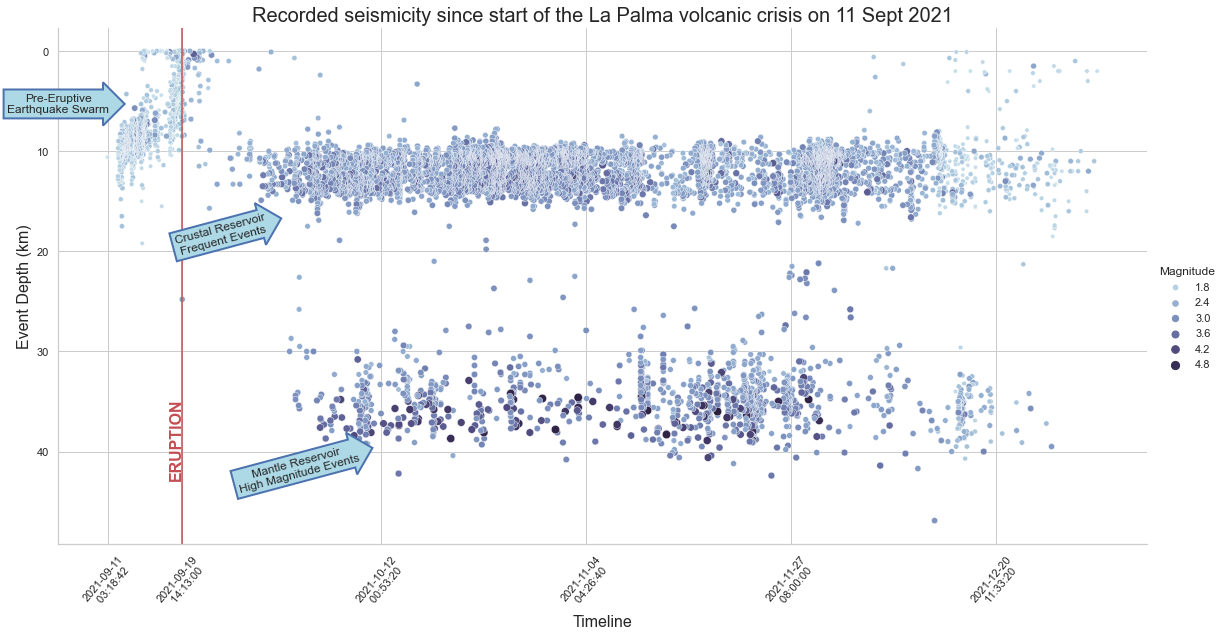

In [10]:
def get_numeric_datetime(dt: str):
    return pd.to_numeric(pd.to_datetime([dt]))[0]

sns.relplot(
    data=df[df['Date'] < '2022-01-01'],
    x="timestamp", y="Depth(km)",
    hue="Magnitude", size="Magnitude", 
    kind="scatter",palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True),
    height=8, aspect=2
)
plt.gca().invert_yaxis()
xticks = plt.gca().get_xticks()
new_xticks = [get_numeric_datetime('2021-09-11 03:18:42'),
    get_numeric_datetime('2021-09-19 14:13:00')]
new_xticks = np.append(new_xticks, xticks[2:-1])
# new_xticks = np.append(new_xticks, [get_numeric_datetime('2021-11-9 16:00:00')])

plt.gca().set_xticks(new_xticks)
xtick_labels = [pd.to_datetime(tm).strftime('%Y-%m-%d\n %H:%M:%S') for tm in new_xticks]
plt.gca().set_xticklabels(xtick_labels, rotation=50)



plt.title('Recorded seismicity since start of the La Palma volcanic crisis on 11 Sept 2021', fontdict=dict(fontsize=20))
plt.xlabel('Timeline', fontsize=16)
plt.ylabel('Event Depth (km)', fontsize=16);


plt.axvline(x=new_xticks[1], ymin=0, color='r')
plt.annotate('ERUPTION', (0.102, 0.13), rotation=90, xycoords='axes fraction', fontweight='bold', fontsize=16, color='r')
plt.annotate("Pre-Eruptive\nEarthquake Swarm", (0.0, 0.835), xycoords='axes fraction', horizontalalignment="center", bbox=dict(boxstyle="rarrow,pad=0.3", fc="lightblue", ec="b", lw=2))
plt.annotate("Crustal Reservoir\nFrequent Events", (0.15, 0.56), rotation=15, xycoords='axes fraction', horizontalalignment="center", bbox=dict(boxstyle="rarrow,pad=0.3", fc="lightblue", ec="b", lw=2))
plt.annotate("Mantle Reservoir\nHigh Magnitude Events", (0.22, 0.1), rotation=15, xycoords='axes fraction', horizontalalignment="center", bbox=dict(boxstyle="rarrow,pad=0.3", fc="lightblue", ec="b", lw=2));

